In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [9]:
df = pd.read_csv("data/data.csv") 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [10]:
print(df.columns.tolist())

['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']


In [11]:
df = df.drop(['Transaction ID', 'Date', 'Customer ID'], axis=1)


In [12]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [13]:
le = LabelEncoder()
df['Product Category'] = le.fit_transform(df['Product Category'])

In [14]:
X = df.drop('Product Category', axis=1)
y = df['Product Category']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

c:\Users\srini\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [21]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.315

Confusion Matrix:
 [[10 30 22]
 [13 30 27]
 [12 33 23]]

Classification Report:
               precision    recall  f1-score   support

      Beauty       0.29      0.16      0.21        62
    Clothing       0.32      0.43      0.37        70
 Electronics       0.32      0.34      0.33        68

    accuracy                           0.32       200
   macro avg       0.31      0.31      0.30       200
weighted avg       0.31      0.32      0.30       200



<Axes: xlabel='Predicted', ylabel='Actual'>

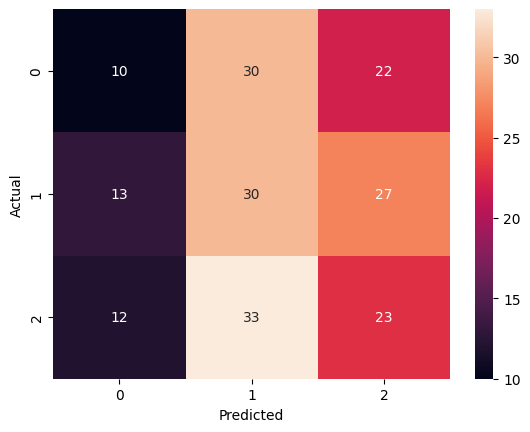

In [23]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted' ])
sns.heatmap(conf_mat, annot=True)

In [24]:
new_customer = pd.DataFrame([{
    'Age': 27,
    'Quantity': 2,
    'Price per Unit': 100,
    'Total Amount': 200,
    'Gender_Male': 1  
}])

pred = model.predict(new_customer)
print("Predicted Product Category:", le.inverse_transform(pred)[0])


Predicted Product Category: Clothing
